In [70]:


def energia_ligadura_mat(Z, A, mat):
    mn=1.00866491588
    mp=1.00727646681
    c_square=931.494
    delta = (Z*mp+(A-Z)*mn - mat )*c_square
    return delta

def Zz(A):
    alpha = 15.75
    beta = 17.8
    gamma = 0.71
    xi = 94.8
    mp = 1.007276
    mn = 1.0086649
    zz = A/(1.98+0.015*A**(2/3))
    
    return zz




In [71]:
def energia_ligadura_gota_liquida(Z, A):
    # Constantes
    alpha = 15.75
    beta = 17.8
    gamma = 0.71
    xi = 94.8
    mp = 1.007276
    mn = 1.0086649
    factor_conversion = 931.5
    factor_exceso_masa = factor_conversion * 1000

    # Calculo común a todas las ramas
    deltaW_comun = alpha * A - beta * A**(2/3) - gamma * (Z**2) / (A**(1/3)) - xi * (A/2 - Z)**2 / A

    # Determinar el término adicional basado en la paridad de Z y A
    if Z % 2 == 0 and (A - Z) % 2 == 0:
        deltaW = deltaW_comun + 34 * A**(-3/4)
    elif A % 2 != 0:
        deltaW = deltaW_comun
    else:  # Z % 2 != 0 and (A - Z) % 2 != 0
        deltaW = deltaW_comun - 34 * A**(-3/4)

    # Cálculo de la masa y el exceso de masa
    masa_uma = (Z * mp + (A - Z) * mn - deltaW / factor_conversion) * 10**6  # uma
    exceso_masa = (masa_uma * 10**(-6) - A) * factor_exceso_masa

    # Formateo de los resultados
    resultado = (
        f"MODELO DE GOTA LÍQUIDA\n"
        f"Delta W, e_n, M_at y exceso masa para Z={Z} y A={A}\n"
        f"\n"
        f"La energía de ligadura es: {deltaW:.2f} MeV\n"
        f"La energía de ligadura por nucleón es: {(deltaW / A * 1000):.2f} KeV\n"
        f"La masa atómica es: {masa_uma:.4f} micro uma\n"
        f"El exceso de masa es: {exceso_masa:.2f} keV"
    )
    return resultado

In [57]:
import matplotlib.pyplot as plt
import numpy as np
A = 14
Z_values = [6, 7, 8]

# Calcular la masa atómica para cada valor de Z
masa_uma_values = []
for Z in Z_values:
    resultado = energia_ligadura_gota_liquida(Z, A)
    masa_uma_str = resultado.split('\n')[-2].split()[-2]  # Obtener el valor numérico de la masa_uma
    masa_uma_values.append(float(masa_uma_str.replace('micro', '')))  # Convertir a float, eliminando 'micro'

# Graficar
plt.plot(Z_values, masa_uma_values, marker='o', linestyle='-', color='b')
plt.title('Masa Atómica en función de la carga nuclear Z')
plt.xlabel('Carga Nuclear (Z)')
plt.ylabel('Masa Atómica (micro uma)')
plt.grid(True)
plt.show()

ValueError: could not convert string to float: ''

In [67]:
def energia_ligadura_gota_liquida(Z, A):
    # Constantes
    alpha = 15.75
    beta = 17.8
    gamma = 0.71
    xi = 94.8
    mp = 1.007276
    mn = 1.0086649
    factor_conversion = 931.5

    # Calculo común a todas las ramas
    deltaW_comun = alpha * A - beta * A**(2/3) - gamma * (Z**2) / (A**(1/3)) - xi * (A/2 - Z)**2 / A

    # Determinar el término adicional basado en la paridad de Z y A
    if Z % 2 == 0 and (A - Z) % 2 == 0:
        deltaW = deltaW_comun + 34 * A**(-3/4)
    elif A % 2 != 0:
        deltaW = deltaW_comun
    else:  # Z % 2 != 0 and (A - Z) % 2 != 0
        deltaW = deltaW_comun - 34 * A**(-3/4)

    # Cálculo de la masa y el exceso de masa
    masa_uma = (Z * mp + (A - Z) * mn - deltaW / factor_conversion) * 10**6  # uma

    # Formateo de los resultados
    resultado = (
        f"MODELO DE GOTA LÍQUIDA Z:{Z:.2f}\n"
        f"\n"
        f"La energía de ligadura es: {deltaW:.2f} MeV\n"
        f"La masa atómica es: {masa_uma:.4f} micro uma\n"
    )
    return resultado




In [75]:
A=40
Z=19
print(energia_ligadura_gota_liquida(Z, A))

MODELO DE GOTA LÍQUIDA
Delta W, e_n, M_at y exceso masa para Z=19 y A=40

La energía de ligadura es: 342.36 MeV
La energía de ligadura por nucleón es: 8558.92 KeV
La masa atómica es: 39952674.1018 micro uma
El exceso de masa es: -44084.07 keV


In [73]:
Z = 6
A = 14
print(energia_ligadura_gota_liquida(Z, A))

MODELO DE GOTA LÍQUIDA
Delta W, e_n, M_at y exceso masa para Z=6 y A=14

La energía de ligadura es: 104.42 MeV
La energía de ligadura por nucleón es: 7458.91 KeV
La masa atómica es: 14000871.4142 micro uma
El exceso de masa es: 811.72 keV


In [40]:
Z = 14
A = 29
print(energia_ligadura_gota_liquida(Z, A))

MODELO DE GOTA LÍQUIDA Z:14.00

La energía de ligadura es: 242.62 MeV
La masa atómica es: 28971374.3494 micro uma



In [41]:
Z = 15
A = 29
print(energia_ligadura_gota_liquida(Z, A))

MODELO DE GOTA LÍQUIDA Z:15.00

La energía de ligadura es: 235.92 MeV
La masa atómica es: 28977180.0632 micro uma



In [42]:
Z = 6
A = 14
print(energia_ligadura_gota_liquida(Z, A))

MODELO DE GOTA LÍQUIDA Z:6.00

La energía de ligadura es: 104.42 MeV
La masa atómica es: 14000871.4142 micro uma



In [43]:
Z = 19
A = 29
print(energia_ligadura_gota_liquida(Z, A))

MODELO DE GOTA LÍQUIDA Z:19.00

La energía de ligadura es: 139.11 MeV
La masa atómica es: 29075551.8498 micro uma



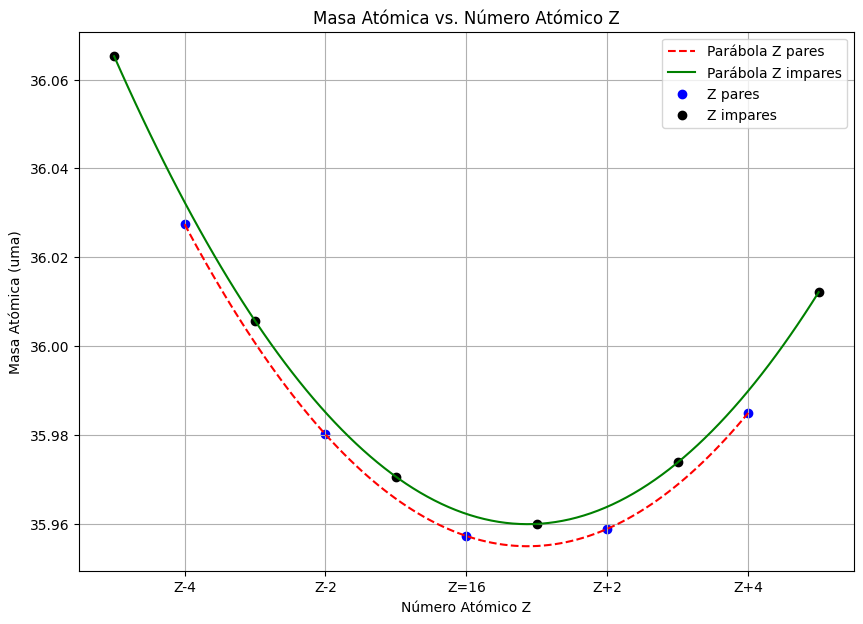

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Definición de la función de masa atómica y energía de ligadura
def masa_energia_ligadura(Z, A):
    # Constantes
    alpha = 15.75
    beta = 17.8
    gamma = 0.71
    xi = 94.8
    delta = 34  # Este valor de delta es un ejemplo para el término de emparejamiento
    mp = 1.007276
    mn = 1.0086649
    factor_conversion = 931.5

    # Calculo de la energía de ligadura
    deltaW_comun = alpha * A - beta * A**(2/3) - gamma * (Z**2) / (A**(1/3)) - xi * (A/2 - Z)**2 / A
    # Se añade o resta el término delta según la paridad de Z y A
    if Z % 2 == 0 and (A - Z) % 2 == 0:  # Núcleos pares-pares
        deltaW = deltaW_comun + delta * A**(-3/4)
    elif Z % 2 != 0 and (A - Z) % 2 != 0:  # Núcleos impares-impares
        deltaW = deltaW_comun - delta * A**(-3/4)
    else:  # Núcleos pares-impares o impares-pares
        deltaW = deltaW_comun

    # Cálculo de la masa atómica
    masa_uma = Z * mp + (A - Z) * mn - deltaW / factor_conversion

    return masa_uma

# Número de masa A constante
A_const = 36

# Valores de Z para núcleos pares e impares
Z_pares = np.array([12, 14, 16, 18, 20])
Z_impares = np.array([11, 13, 15, 17, 19, 21])

# Cálculo de las masas atómicas para Z pares e impares
masa_uma_pares = [masa_energia_ligadura(Z, A_const) for Z in Z_pares]
masa_uma_impares = [masa_energia_ligadura(Z, A_const) for Z in Z_impares]

# Ajuste parabólico para Z pares e impares
coef_pares = np.polyfit(Z_pares, masa_uma_pares, 2)
coef_impares = np.polyfit(Z_impares, masa_uma_impares, 2)
parabola_pares = np.poly1d(coef_pares)
parabola_impares = np.poly1d(coef_impares)

# Generación de puntos para la gráfica de las parábolas
Z_line_pares = np.linspace(Z_pares.min(), Z_pares.max(), 100)
Z_line_impares = np.linspace(Z_impares.min(), Z_impares.max(), 100)

# Creación de las gráficas
plt.figure(figsize=(10, 7))

# Gráfica de parábolas
plt.plot(Z_line_pares, parabola_pares(Z_line_pares), 'r--', label='Parábola Z pares')
plt.plot(Z_line_impares, parabola_impares(Z_line_impares), 'g-', label='Parábola Z impares')

# Gráfica de puntos de Z pares e impares
plt.scatter(Z_pares, masa_uma_pares, color='blue', label='Z pares')
plt.scatter(Z_impares, masa_uma_impares, color='black', label='Z impares')

# Etiquetas y título
plt.xlabel('Número Atómico Z')
labels_x = ["Z-4", "Z-2", "Z=16", "Z+2", "Z+4"]
posiciones_x = [12, 14, 16, 18, 20]  # Ajusta estos valores según tu necesidad

plt.xticks(posiciones_x, labels_x)
plt.ylabel('Masa Atómica (uma)')
plt.title('Masa Atómica vs. Número Atómico Z')
plt.legend()
plt.grid(True)

# Mostrar gráfica
plt.savefig('dos.pdf')




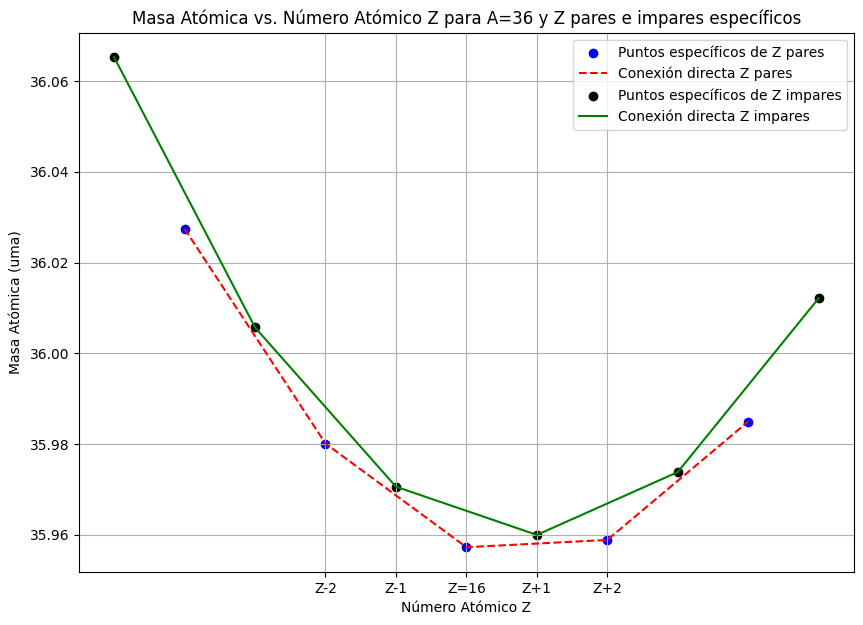

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función de masa atómica y energía de ligadura


# A constante
A_const = 36

# Valores específicos de Z para pares e impares
Z_specific = np.array([12, 14, 16, 18, 20])
Z_impares_especific = np.array([11, 13, 15, 17, 19, 21])

# Cálculo de la masa atómica para los valores de Z
masa_uma_specific = [masa_energia_ligadura(Z, A_const)[1] for Z in Z_specific]
masa_uma_impares_especific = [masa_energia_ligadura(Z, A_const)[1] for Z in Z_impares_especific]

# Gráficas
plt.figure(figsize=(10, 7))

# Gráfico de puntos y línea para los valores pares de Z
plt.scatter(Z_specific, masa_uma_specific, color='blue', label='Puntos específicos de Z pares')
plt.plot(Z_specific, masa_uma_specific, 'r--', label='Conexión directa Z pares')

# Gráfico de puntos y línea para los valores impares de Z
plt.scatter(Z_impares_especific, masa_uma_impares_especific, color='black', label='Puntos específicos de Z impares')
plt.plot(Z_impares_especific, masa_uma_impares_especific, 'g-', label='Conexión directa Z impares')

# Etiquetas y título
plt.xlabel('Número Atómico Z')
plt.ylabel('Masa Atómica (uma)')
plt.title(f'Masa Atómica vs. Número Atómico Z para A={A_const} y Z pares e impares específicos')
labels_x = ["Z-2", "Z-1", "Z=16", "Z+1", "Z+2"]
posiciones_x = [14, 15, 16, 17, 18]  # Ajusta estos valores según tu necesidad

plt.xticks(posiciones_x, labels_x)
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.savefig('tres.pdf')

In [36]:
def energia_ligadura_gota_liquida(Z, A):
    # Constantes
    alpha = 15.75  # MeV
    beta = 17.8    # MeV
    gamma = 0.71   # MeV
    xi = 94.8      # MeV
    delta = 34     # MeV para término de emparejamiento

    # Calculo de la energia de ligadura
    deltaW_comun = alpha * A - beta * A**(2/3) - gamma * (Z**2) / (A**(1/3)) - xi * (A/2 - Z)**2 / A
    # Se anade o resta el termino delta segun la paridad de Z y A
    if Z % 2 == 0 and (A - Z) % 2 == 0:  # Nucleos pares-pares
        deltaW = deltaW_comun + delta * A**(-3/4)
    elif Z % 2 != 0 and (A - Z) % 2 != 0:  # Nucleos impares-impares
        deltaW = deltaW_comun - delta * A**(-3/4)
    else:  # Nucleos pares-impares o impares-pares
        deltaW = deltaW_comun

    return deltaW

# Núclidos doblemente mágicos
nucleidos_magicos = [(8, 16), (20, 40), (82, 208)]

# Calculo de la energia de ligadura para cada nucleido magico
for Z, A in nucleidos_magicos:
    energia_ligadura = energia_ligadura_gota_liquida(Z, A)
    print(f"Energia de ligadura para el nucleido {A}_{Z}: {energia_ligadura:.2f} MeV")

Energia de ligadura para el nucleido 16_8: 125.19 MeV
Energia de ligadura para el nucleido 40_20: 340.91 MeV
Energia de ligadura para el nucleido 208_82: 1625.40 MeV
